# Part 1: Clustering with k-means

k=2, distortion=77943099.87829885
k=3, distortion=50517769.559281915
k=4, distortion=29229961.235911913
k=5, distortion=20672701.394358817
k=6, distortion=16656145.848462624
k=7, distortion=15123237.123080688


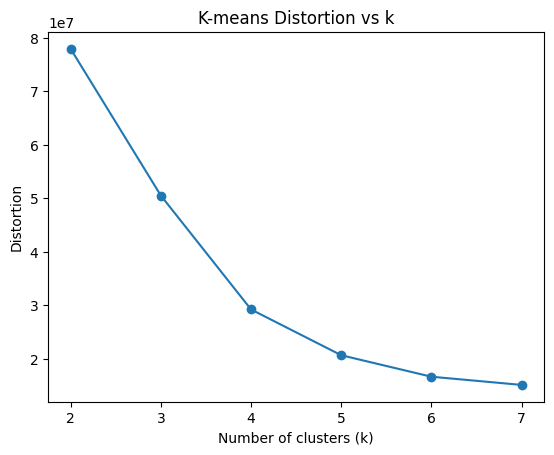

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# -------------------------
# 1. Implement k-means
# -------------------------
def initialize_centroids(X, k, method="random"):
    n_samples, n_features = X.shape
    if method == "random":
        idx = np.random.choice(n_samples, k, replace=False)
        return X[idx]
    elif method == "kmeans++":
        centroids = []
        centroids.append(X[np.random.randint(0, n_samples)])
        for _ in range(1, k):
            dist_sq = np.min([np.sum((X - c) ** 2, axis=1) for c in centroids], axis=0)
            probs = dist_sq / np.sum(dist_sq)
            chosen = np.random.choice(n_samples, p=probs)
            centroids.append(X[chosen])
        return np.array(centroids)
    else:
        raise ValueError("Unknown initialization method.")

def kmeans(X, k, max_iter=300, tol=1e-4, init="kmeans++"):
    centroids = initialize_centroids(X, k, method=init)
    for _ in range(max_iter):
        # Assign clusters
        dists = np.linalg.norm(X[:, None] - centroids[None, :], axis=2)
        labels = np.argmin(dists, axis=1)

        # Compute new centroids
        new_centroids = np.array([X[labels == j].mean(axis=0) if np.any(labels == j) else centroids[j] for j in range(k)])

        # Check convergence
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    return centroids, labels

def distortion(X, centroids, labels):
    return np.sum([np.sum((X[labels == j] - centroids[j]) ** 2) for j in range(len(centroids))])

# -------------------------
# 2. Run k-means
# -------------------------
data = load_breast_cancer()
X = data.data

ks = range(2, 8)
distortions = []

for k in ks:
    centroids, labels = kmeans(X, k, init="kmeans++")
    d = distortion(X, centroids, labels)
    distortions.append(d)
    print(f"k={k}, distortion={d}")


# -------------------------
# 3. Plot distortion
# -------------------------
plt.plot(ks, distortions, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Distortion")
plt.title("K-means Distortion vs k")
plt.show()



Using the elbow method, the most appropriate value k is 4. From the distortion values, we see
large percentage improvements between k = 2 → 3 (39.3%) and k = 3 → 4 (38.3%). However,
after k = 4, the relative improvements drop significantly: k = 4 → 5 (29.3%), k = 5 → 6 (19.3%),
and k = 6 → 7 (9.4%). This shows that beyond k = 4, the distortion curve flattens, and additional
clusters provide diminishing returns. Therefore, k = 4 is the optimal choice, as it balances low
distortion with model simplicity.
The “elbow” is often chosen at the first major bend in the curve, which is clearly between k=3
and k=4. While k=5 still reduces distortion by ~29%, the largest distortion improvements occur
up to k=4 (≈39% and 38%”)